In [1]:
import os

import cv2
import numpy as np
import pandas as pd
import random

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

%matplotlib inline

# Images Analysis

In [2]:
df_train = pd.read_csv('../data/Train.csv')

len(df_train)

2002

In [3]:
df_test = pd.read_csv('../data/Test.csv')

len(df_test)

858

In [4]:
os.getcwd()

images_dir = "../data/TreeImages/"

all_images = os.listdir(images_dir)

In [5]:
def extract_image_stats(images_dir):
    """
    Iterate through images in a directory, and extract the image min, max, mean, and std for each channel and 
    averaged across all channels, add these data as rows in a pandas dataframe
    
    Parameters:
    images_dir (str): Directory containing the images
    
    Returns:
    stats_df (pandas.DataFrame): Dataframe containing image stats for each image
    """

    stats = []
    for filename in os.listdir(images_dir):
        img = cv2.imread(os.path.join(images_dir, filename))
            
        channels = {'b': img[:,:,0], 'g': img[:,:,1], 'r': img[:,:,2]}
        
        img_stats = {'ImageId': filename, 'img_min': img.min(), 'img_max': img.max(), 'img_mean': img.mean(), 'img_std': img.std()}

        channel_stats = [{f"min_{c}": v.min(), f"max_{c}": v.max(), f"std_{c}": v.std(), f"mean_{c}": v.mean()} for c, v in channels.items()]
        channel_stats = {k: v for d in channel_stats for k, v in d.items()}
        stats.append(dict(**img_stats, **channel_stats))
        
    return pd.DataFrame(stats).round(decimals=2)

In [6]:
df = extract_image_stats(images_dir)

In [7]:
df = pd.merge(df_train, df, on='ImageId', how='right')

Text(0.5, 1.0, 'Target distribution')

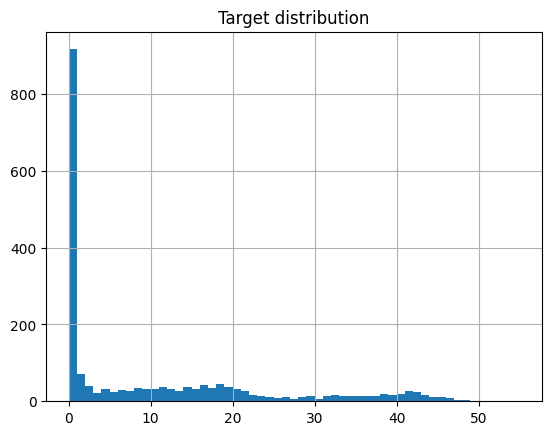

In [18]:
df.loc[df["Target"].notnull()]['Target'].hist(bins=int(df["Target"].max())).set_title('Target distribution')

In [25]:
n_images = len(df)
n_empty = sum(df['img_mean'] == 0)


print(f"Number of images: {n_images}")
print(f"Number of empty images: {n_empty}")
print(f"% of empty images: {n_empty / n_images * 100:.2f}")


Number of images: 2860
Number of empty images: 807
% of empty images: 28.22


In [9]:
df_non_zero = df.loc[~(df['img_mean'] == 0)]

Text(0.5, 1.0, 'Non-empty images mean pixel values')

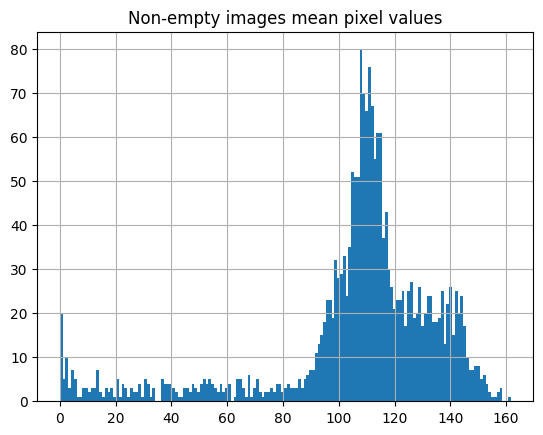

In [26]:
df_non_zero["img_mean"].hist(bins=int(df_non_zero["img_mean"].max())).set_title('Non-empty images mean pixel values')

Text(0.5, 1.0, 'Non-empty images std pixel values')

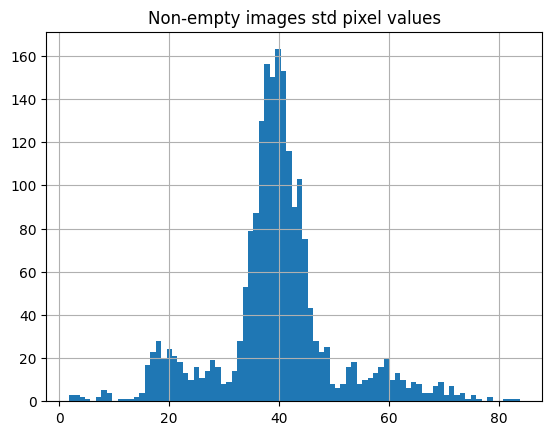

In [27]:
df_non_zero["img_std"].hist(bins=int(df_non_zero["img_std"].max())).set_title('Non-empty images std pixel values')

In [12]:
df_non_zero

ImageId  Target  img_min  img_max  img_mean  img_std  min_b  \
2     Id_tdp3mijkm3.png     NaN        0      255    112.38    61.63      0   
3     Id_19dmjzgnew.png     3.0        0      255    118.65    42.04      0   
4     Id_4lr9uu0x6q.png     0.0        0      255    111.30    40.28      0   
5     Id_crwpal3s80.png     3.0        4      255    135.19    36.24      4   
6     Id_ro29518yz7.png     NaN        0      255    145.09    37.43      0   
...                 ...     ...      ...      ...       ...      ...    ...   
2850  Id_r6odseipzp.png    29.0        0      248     98.79    38.85      0   
2852  Id_30vta0ojfr.png    18.0        0      255    143.04    27.28      0   
2853  Id_scf1bqac43.png    33.0        2      255    102.28    36.40      6   
2854  Id_dh9xlkgn2p.png    41.0        0      255    109.73    40.60      1   
2857  Id_moci1ld6xh.png     0.0        0      252     94.97    77.97      0   

      max_b  std_b  mean_b  min_g  max_g  std_g  mean_g  min_r  max_r  std_r  \
2       220  52.28   91.12      0    255  62.64  131.68      0    247  62.54   
3       210  31.64   88.86     30    255  35.50  146.74      0    245  36.89   
4       229  30.73   87.98     21    255  33.46  131.63      0    255  42.88   
5       255  28.65  105.69     32    255  21.91  148.20     12    255  36.43   
6       219  28.33  117.56     36    255  25.62  155.96      7    255  39.88   
...     ...    ...     ...    ...    ...    ...     ...    ...    ...    ...   
2850    211  30.29   89.27     18    248  38.32  123.96      0    214  34.24   
2852    237  23.51  125.86     36    255  22.86  153.40      1    255  26.61   
2853    210  30.04   92.63     33    255  36.71  124.81      2    214  30.97   
2854    218  32.65   92.56     23    255  35.64  139.92      0    244  35.11   
2857    210  61.67   74.82      0    249  80.79  104.13      0    252  85.42   

      mean_r  
2     114.35  
3     120.35  
4     114.28  
5     151.68  
6     161.76  
...      ...  
2850   83.15  
2852  149.87  
2853   89.41  
2854   96.70  
2857  105.96  

[2053 rows x 18 columns]

# Correlations

In [36]:
df_target = df.loc[df["Target"].notnull()]

df_target[df_target.columns[1:]].corr()['Target'][:].sort_values(ascending=False)

Target      1.000000
mean_g      0.510039
mean_b      0.497588
max_g       0.486881
img_max     0.485437
img_mean    0.481821
max_r       0.458681
max_b       0.456458
mean_r      0.422932
min_g       0.408032
std_b       0.402205
img_std     0.398032
std_g       0.374765
std_r       0.357494
min_r       0.062249
min_b       0.058839
img_min     0.029847
Name: Target, dtype: float64

# Images Montage

In [28]:
df_random = df.loc[df['Target'].notnull()].sample(n=50, random_state=42)

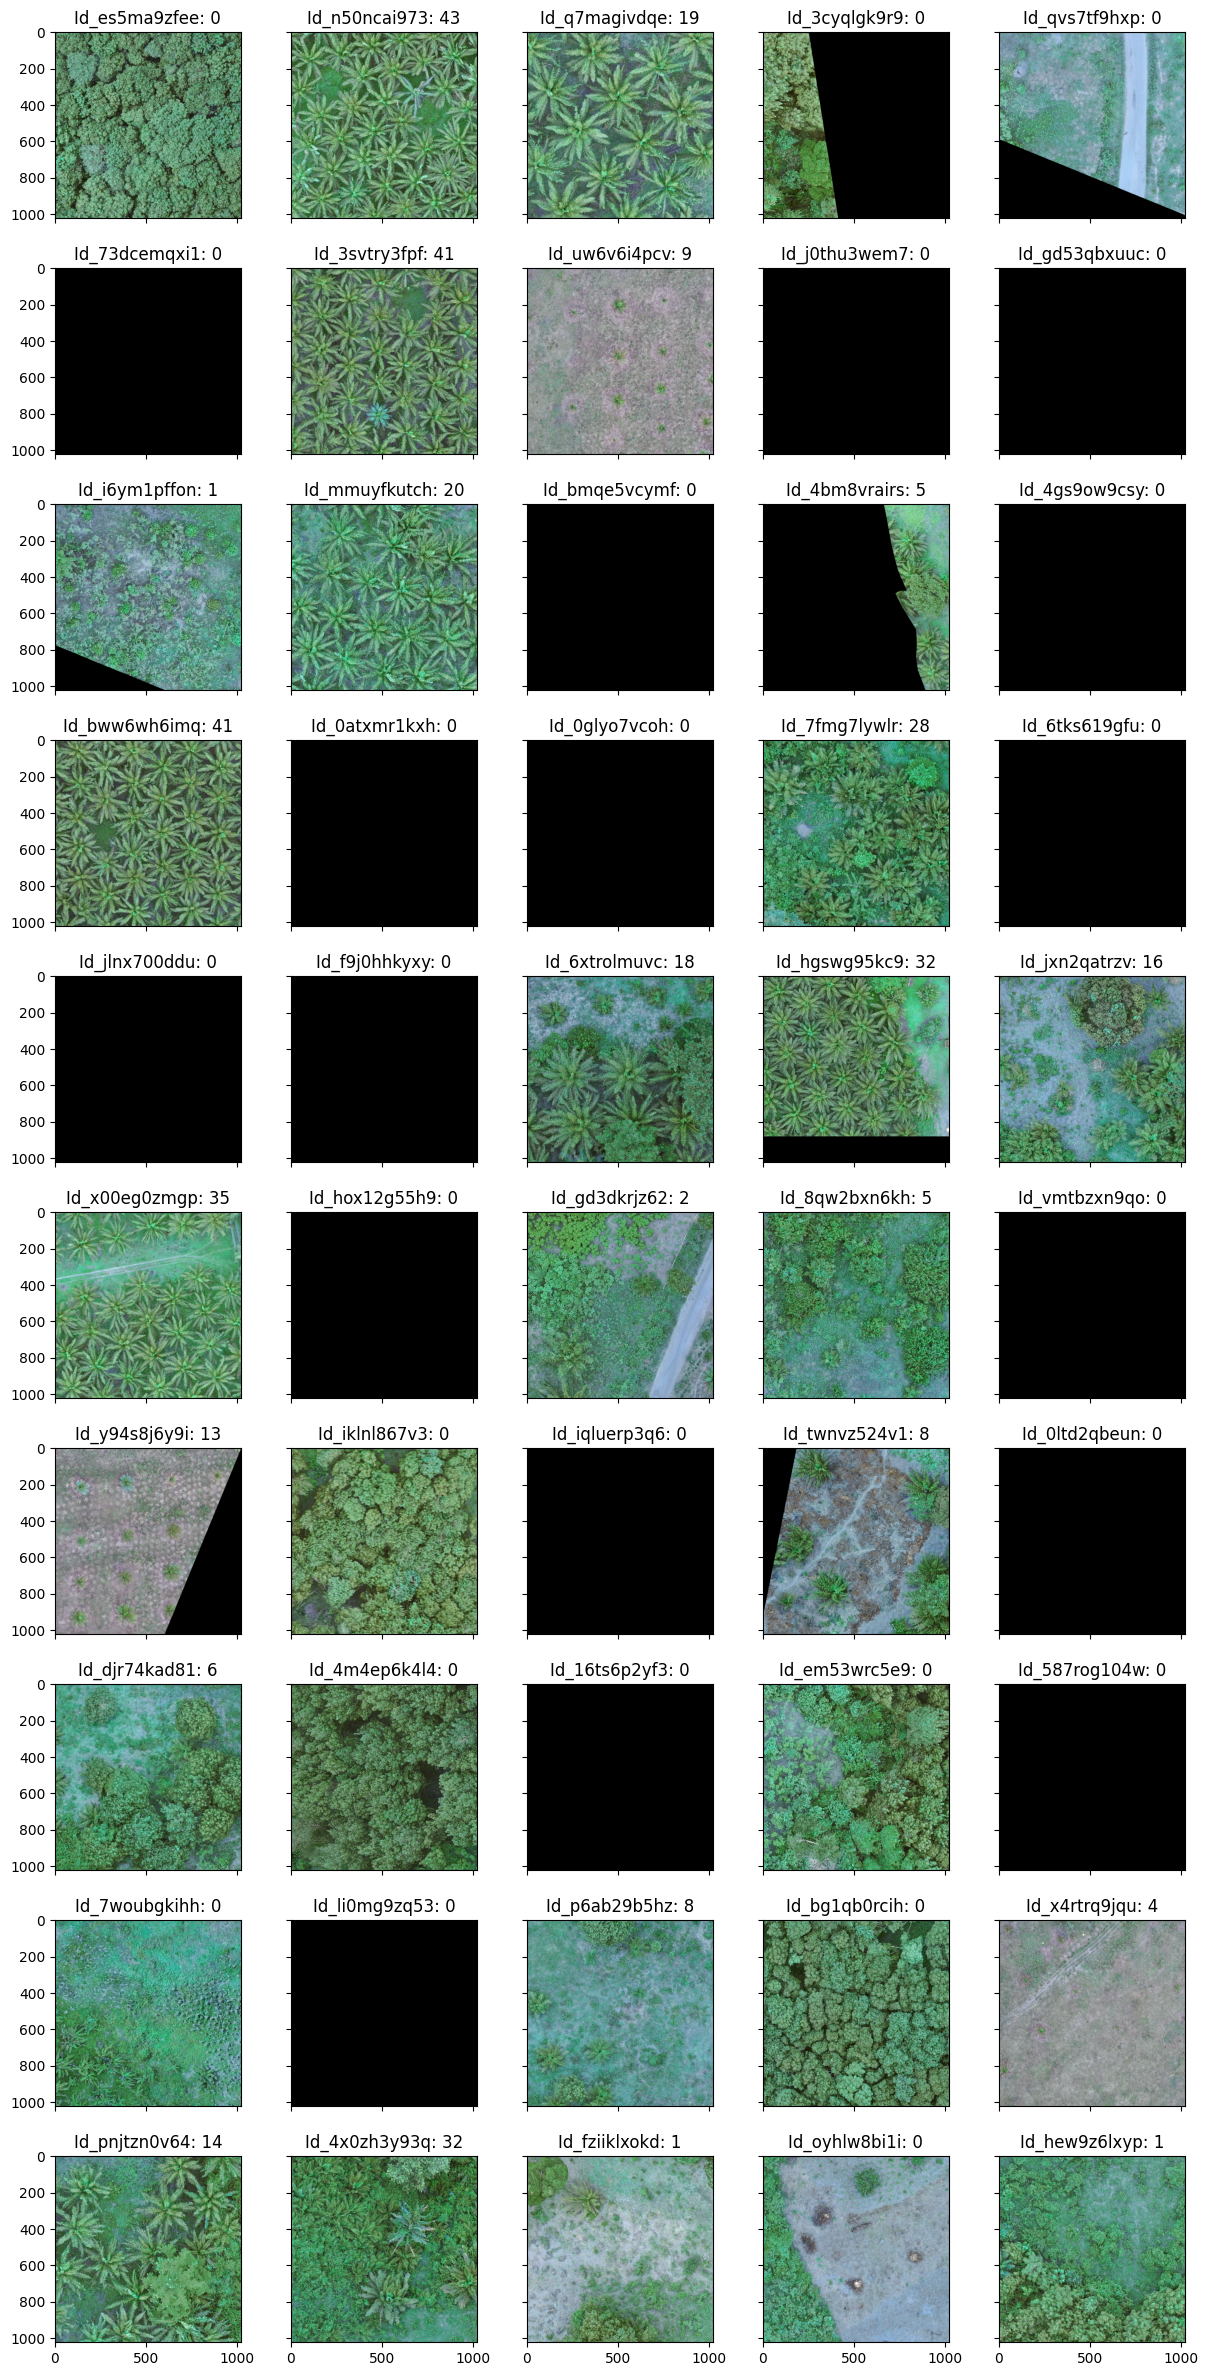

In [29]:
fig = plt.figure(figsize=(20, 30))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(10, 5),
                 axes_pad=0.5,
                 )

file_names = [file_name for file_name in df_random['ImageId']]

targets = [t for t in df_random['Target']]

for i, (ax, img) in enumerate(zip(grid, file_names)):
    file_name = file_names[i]
    ax.set(title=f"{file_name.split('.png')[0]}: {int(targets[i])}")
    ax.imshow(cv2.imread(os.path.join(images_dir, file_name)))

# Scale Images

In [30]:
#img = cv2.imread('../data/TreeImages/Id_0tko96xpuj.png')
#img = cv2.imread('../data/TreeImages/Id_0egm0q0k5w.png')
#img = cv2.imread('../data/TreeImages/Id_1w6bxoo1kl.png')
#img = cv2.imread('../data/TreeImages/Id_1z2vrulnga.png')
#img = cv2.imread('../data/TreeImages/Id_hycwtqhorz.png')
#img = cv2.imread('../data/TreeImages/Id_omaf8y5myk.png')

In [31]:
def transform_images(img):
    H, W = img.shape[0:2]
    
    if img.max(): # image has data
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

        # Find contours of non-zero regions
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Get the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
                
        # Get the polygon that describes the contour
        epsilon = 0.01 * cv2.arcLength(largest_contour, True)
        approx = cv2.approxPolyDP(largest_contour, epsilon, True)

        approx = np.reshape(approx, (approx.shape[0], -1)).astype('float32')

        if len(approx) != 4:
            x, y, w, h = cv2.boundingRect(largest_contour)
            approx = np.array([[x, y], [x, y+h -1], [x+w -1, y+h -1], [x+w -1, y] ], dtype=np.float32)

        # Define the target coordinates of the square
        pts_dst = np.array([[0, 0], [0, H-1], [W-1, H-1], [W-1, 0]], dtype=np.float32)

        # Compute the perspective transform matrix
        M = cv2.getPerspectiveTransform(approx, pts_dst)

        # Warp the image using the perspective transform matrix
        img_warped = cv2.warpPerspective(img, M, (H, W))
    else:
        img_warped = img

    return img_warped

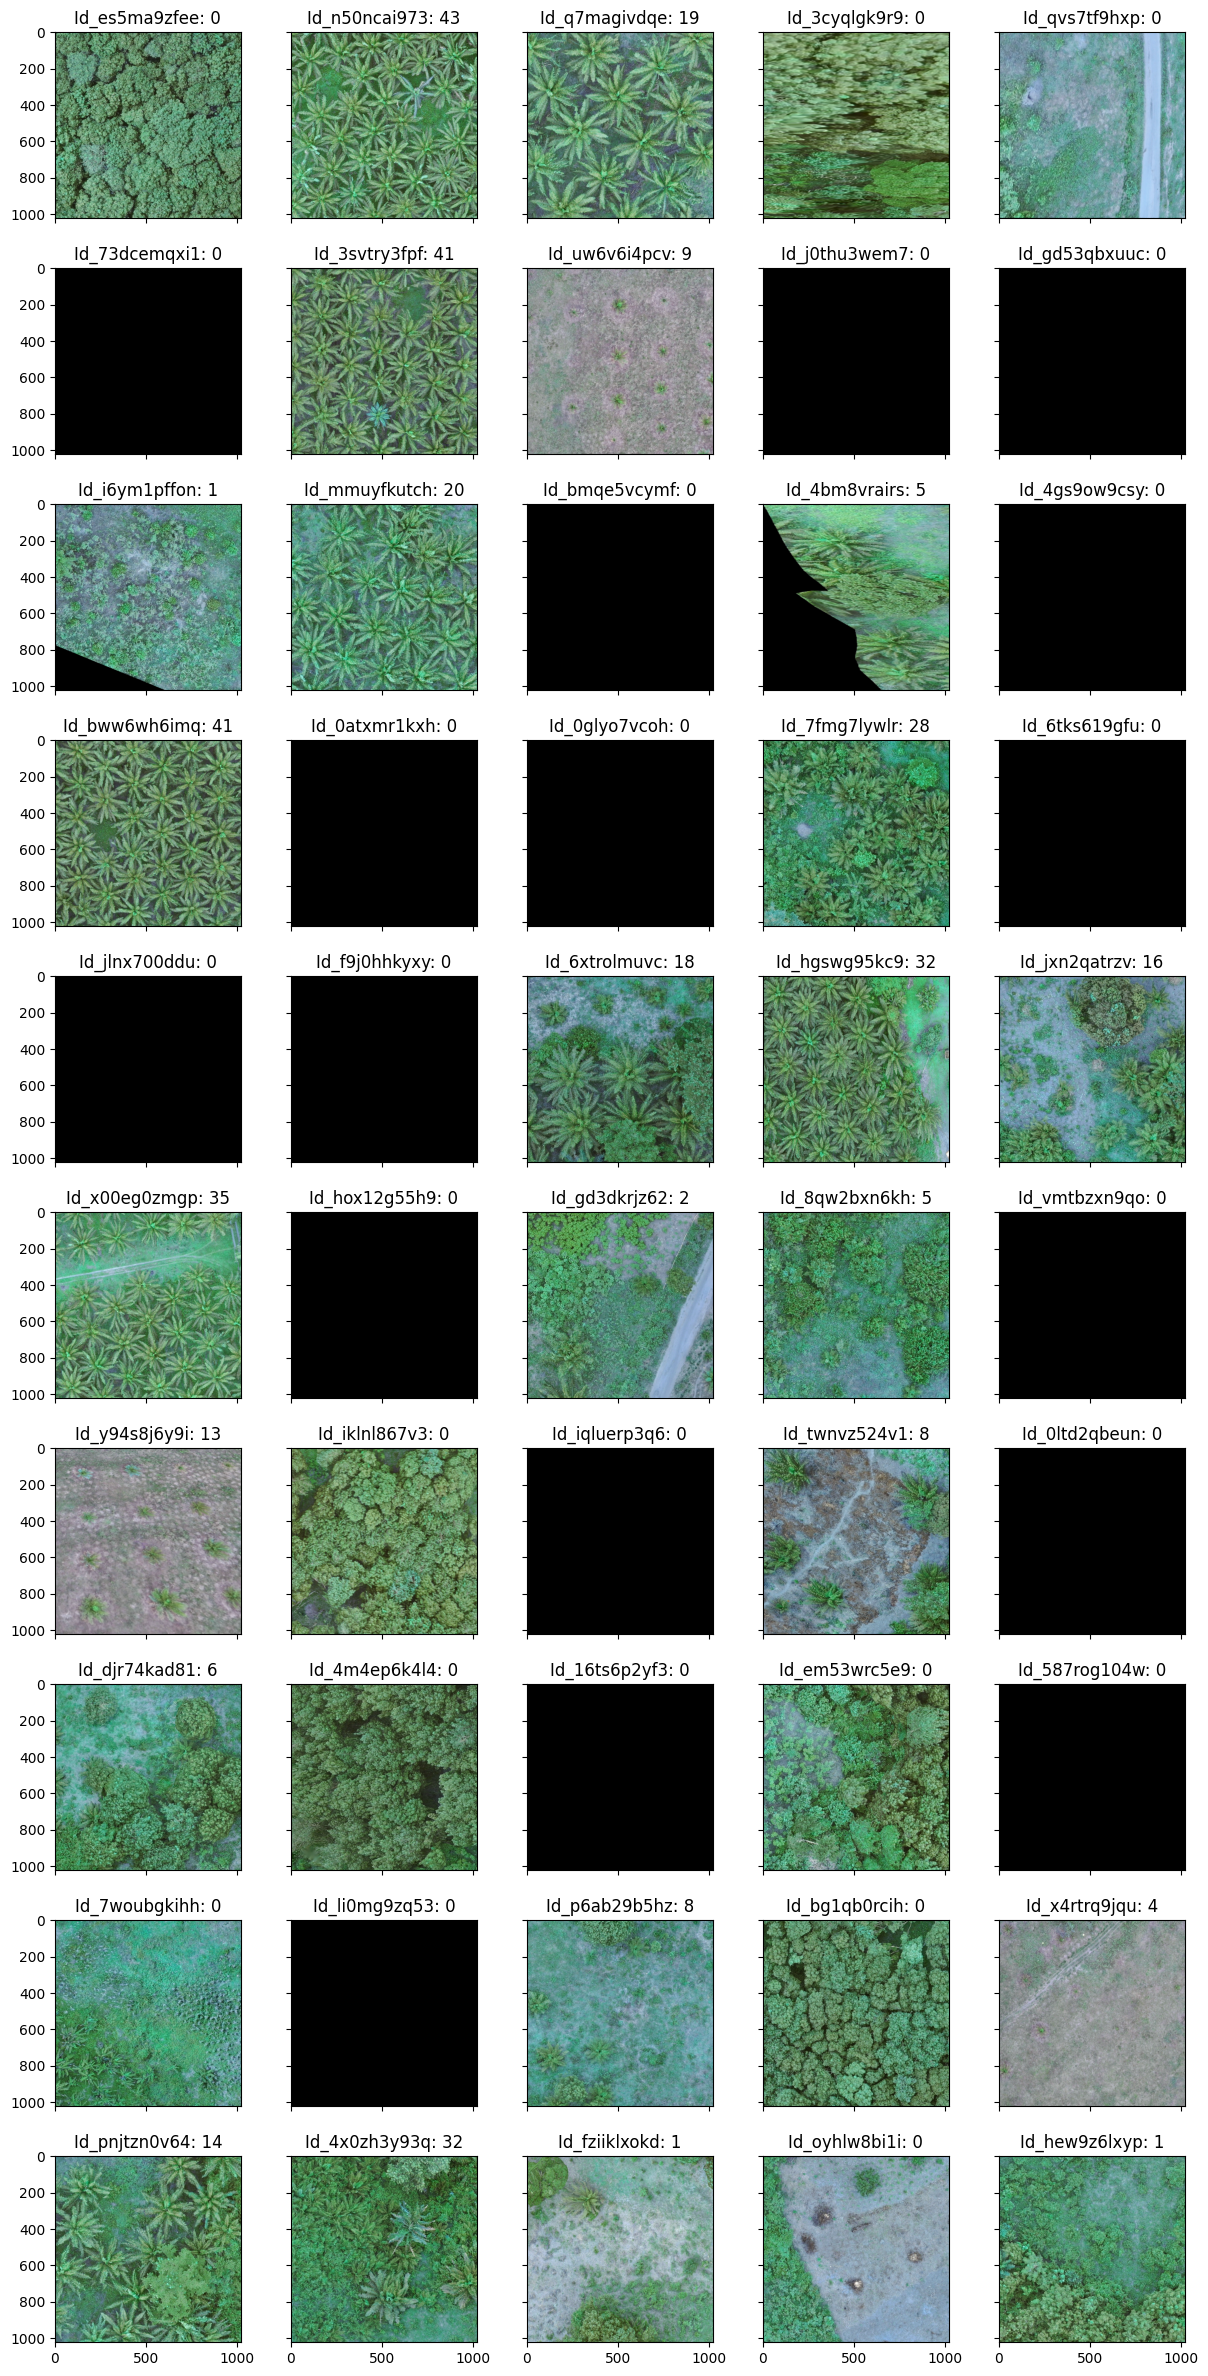

In [32]:
fig = plt.figure(figsize=(20, 30))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(10, 5),
                 axes_pad=0.5,
                 )

file_names = [file_name for file_name in df_random['ImageId']]

targets = [t for t in df_random['Target']]

for i, (ax, img) in enumerate(zip(grid, file_names)):
    file_name = file_names[i]
    ax.set(title=f"{file_name.split('.png')[0]}: {int(targets[i])}")
    ax.imshow(transform_images(cv2.imread(os.path.join(images_dir, file_name))))